---

## Investigating Fraud Cases

In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
data_train_clean = pd.read_csv("data/data_train_clean.csv")

In [2]:
frauds = data_train_clean.query('FraudResult == 1')

In [3]:
!pip install plotly

In [4]:
frauds.groupby('ProductCategory').count()

,Unnamed: 0,TransactionId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ChannelId,Value,PricingStrategy,FraudResult,TransactionDate,DayTime,TransactionWeekday,DebitCredit,TransactionInBatch,value_amount_diff,TransactionsToDate
ProductCategory,,,,,,,,,,,,,,,,,,
airtime,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18
financial_services,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161
transport,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
utility_bill,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12


In [5]:
#What is the amount percentage of frauds?

sum_fraud = data_train_clean[data_train_clean['FraudResult'] == 1]['Value'].sum() 
sum_fraud / data_train_clean['Value'].sum() * 100

31.826427647431633

In [6]:
sum_fraud2 = data_train_clean[data_train_clean['FraudResult'] == 1]['TransactionId'].count() 
sum_fraud2 / data_train_clean['TransactionId'].count() * 100

0.20175200183981098

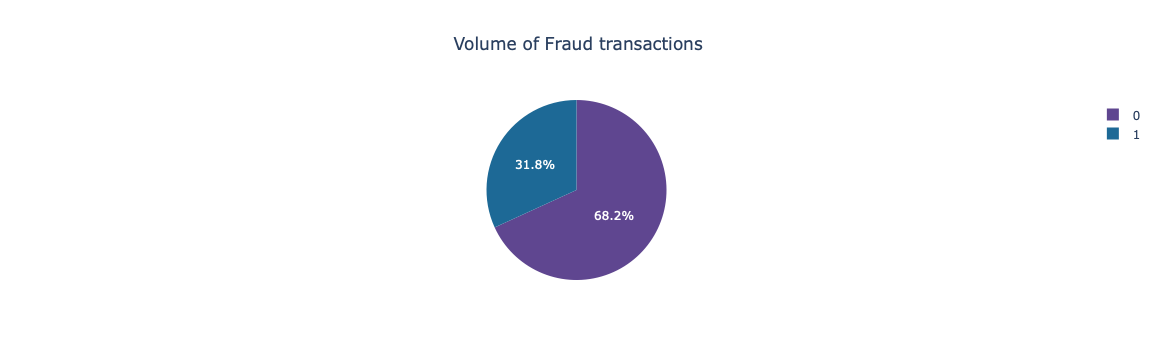

In [37]:
import plotly.express as px

a = px.pie(data_train_clean.groupby('FraudResult').sum()[['Value']].reset_index(), 
           values = 'Value', names ='FraudResult',
           title='Volume of Fraud transactions',
           color_discrete_sequence=px.colors.qualitative.Prism,
   #        color_discrete_map={'0':'lightcyan',
     #                          '1':'cyan',
      #                          })
                                  )
a.update_layout(title_x=0.5)

                                  
                
#a.write_image('graphs/Volume_of_fraud_transactions.png')

In [28]:
pip install -U kaleido

     |█████████████▋                  | 36.4 MB 95 kB/s eta 0:08:38 ^C

ERROR: Operation cancelled by user
Note: you may need to restart the kernel to use updated packages.


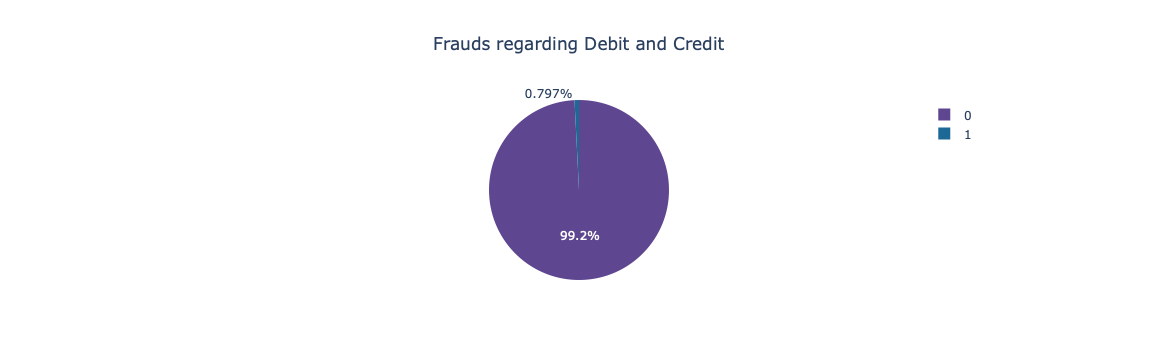

In [8]:

a = px.pie(frauds.groupby('DebitCredit').sum()[['Value']].reset_index(), 
           values = 'Value', names ='DebitCredit',
           title='Frauds regarding Debit and Credit',
           color_discrete_sequence=px.colors.qualitative.Prism,
   #        color_discrete_map={'0':'lightcyan',
     #                          '1':'cyan',
      #                          })
                                  )
a.update_layout(title_x=0.5)
fig.savefig('../graphs/distribution-conditions.png', dpi=300, transparent=True, pad_inches=1)

In [9]:
data_train_clean.groupby('ProductCategory').count()

,Unnamed: 0,TransactionId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ChannelId,Value,PricingStrategy,FraudResult,TransactionDate,DayTime,TransactionWeekday,DebitCredit,TransactionInBatch,value_amount_diff,TransactionsToDate
ProductCategory,,,,,,,,,,,,,,,,,,
airtime,45027,45027,45027,45027,45027,45027,45027,45027,45027,45027,45027,45027,45027,45027,45027,45027,45027,45027
data_bundles,1613,1613,1613,1613,1613,1613,1613,1613,1613,1613,1613,1613,1613,1613,1613,1613,1613,1613
financial_services,45405,45405,45405,45405,45405,45405,45405,45405,45405,45405,45405,45405,45405,45405,45405,45405,45405,45405
movies,175,175,175,175,175,175,175,175,175,175,175,175,175,175,175,175,175,175
other,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
ticket,216,216,216,216,216,216,216,216,216,216,216,216,216,216,216,216,216,216
transport,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25
tv,1279,1279,1279,1279,1279,1279,1279,1279,1279,1279,1279,1279,1279,1279,1279,1279,1279,1279
utility_bill,1920,1920,1920,1920,1920,1920,1920,1920,1920,1920,1920,1920,1920,1920,1920,1920,1920,1920


In [10]:
#frauds.groupby(['AccountId', 'CustomerId']).mean()

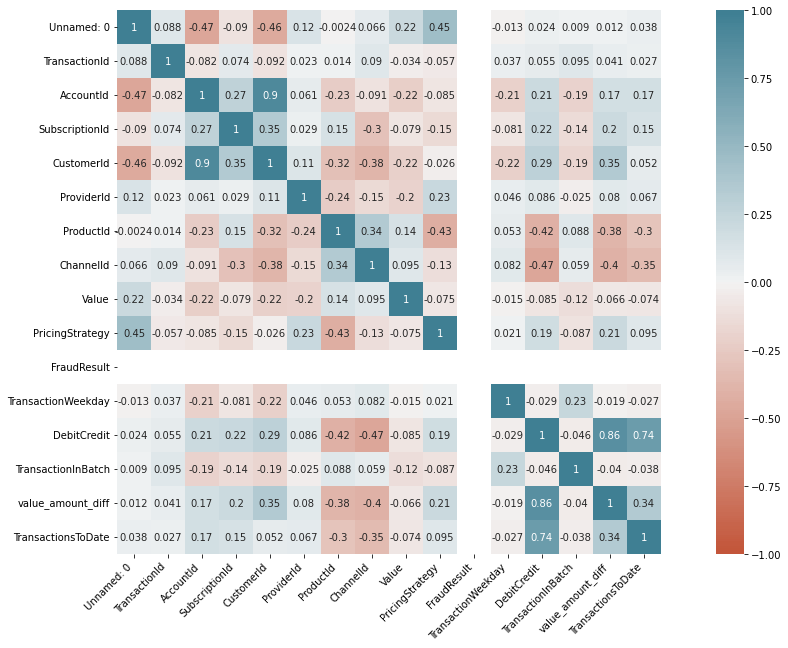

In [11]:
# Erstellen der Heatmap aller Variablen mit Korrelationskoeffizienten

plt.figure(figsize = (20,10))
corr = frauds.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True, 
 #   fmt="f"
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

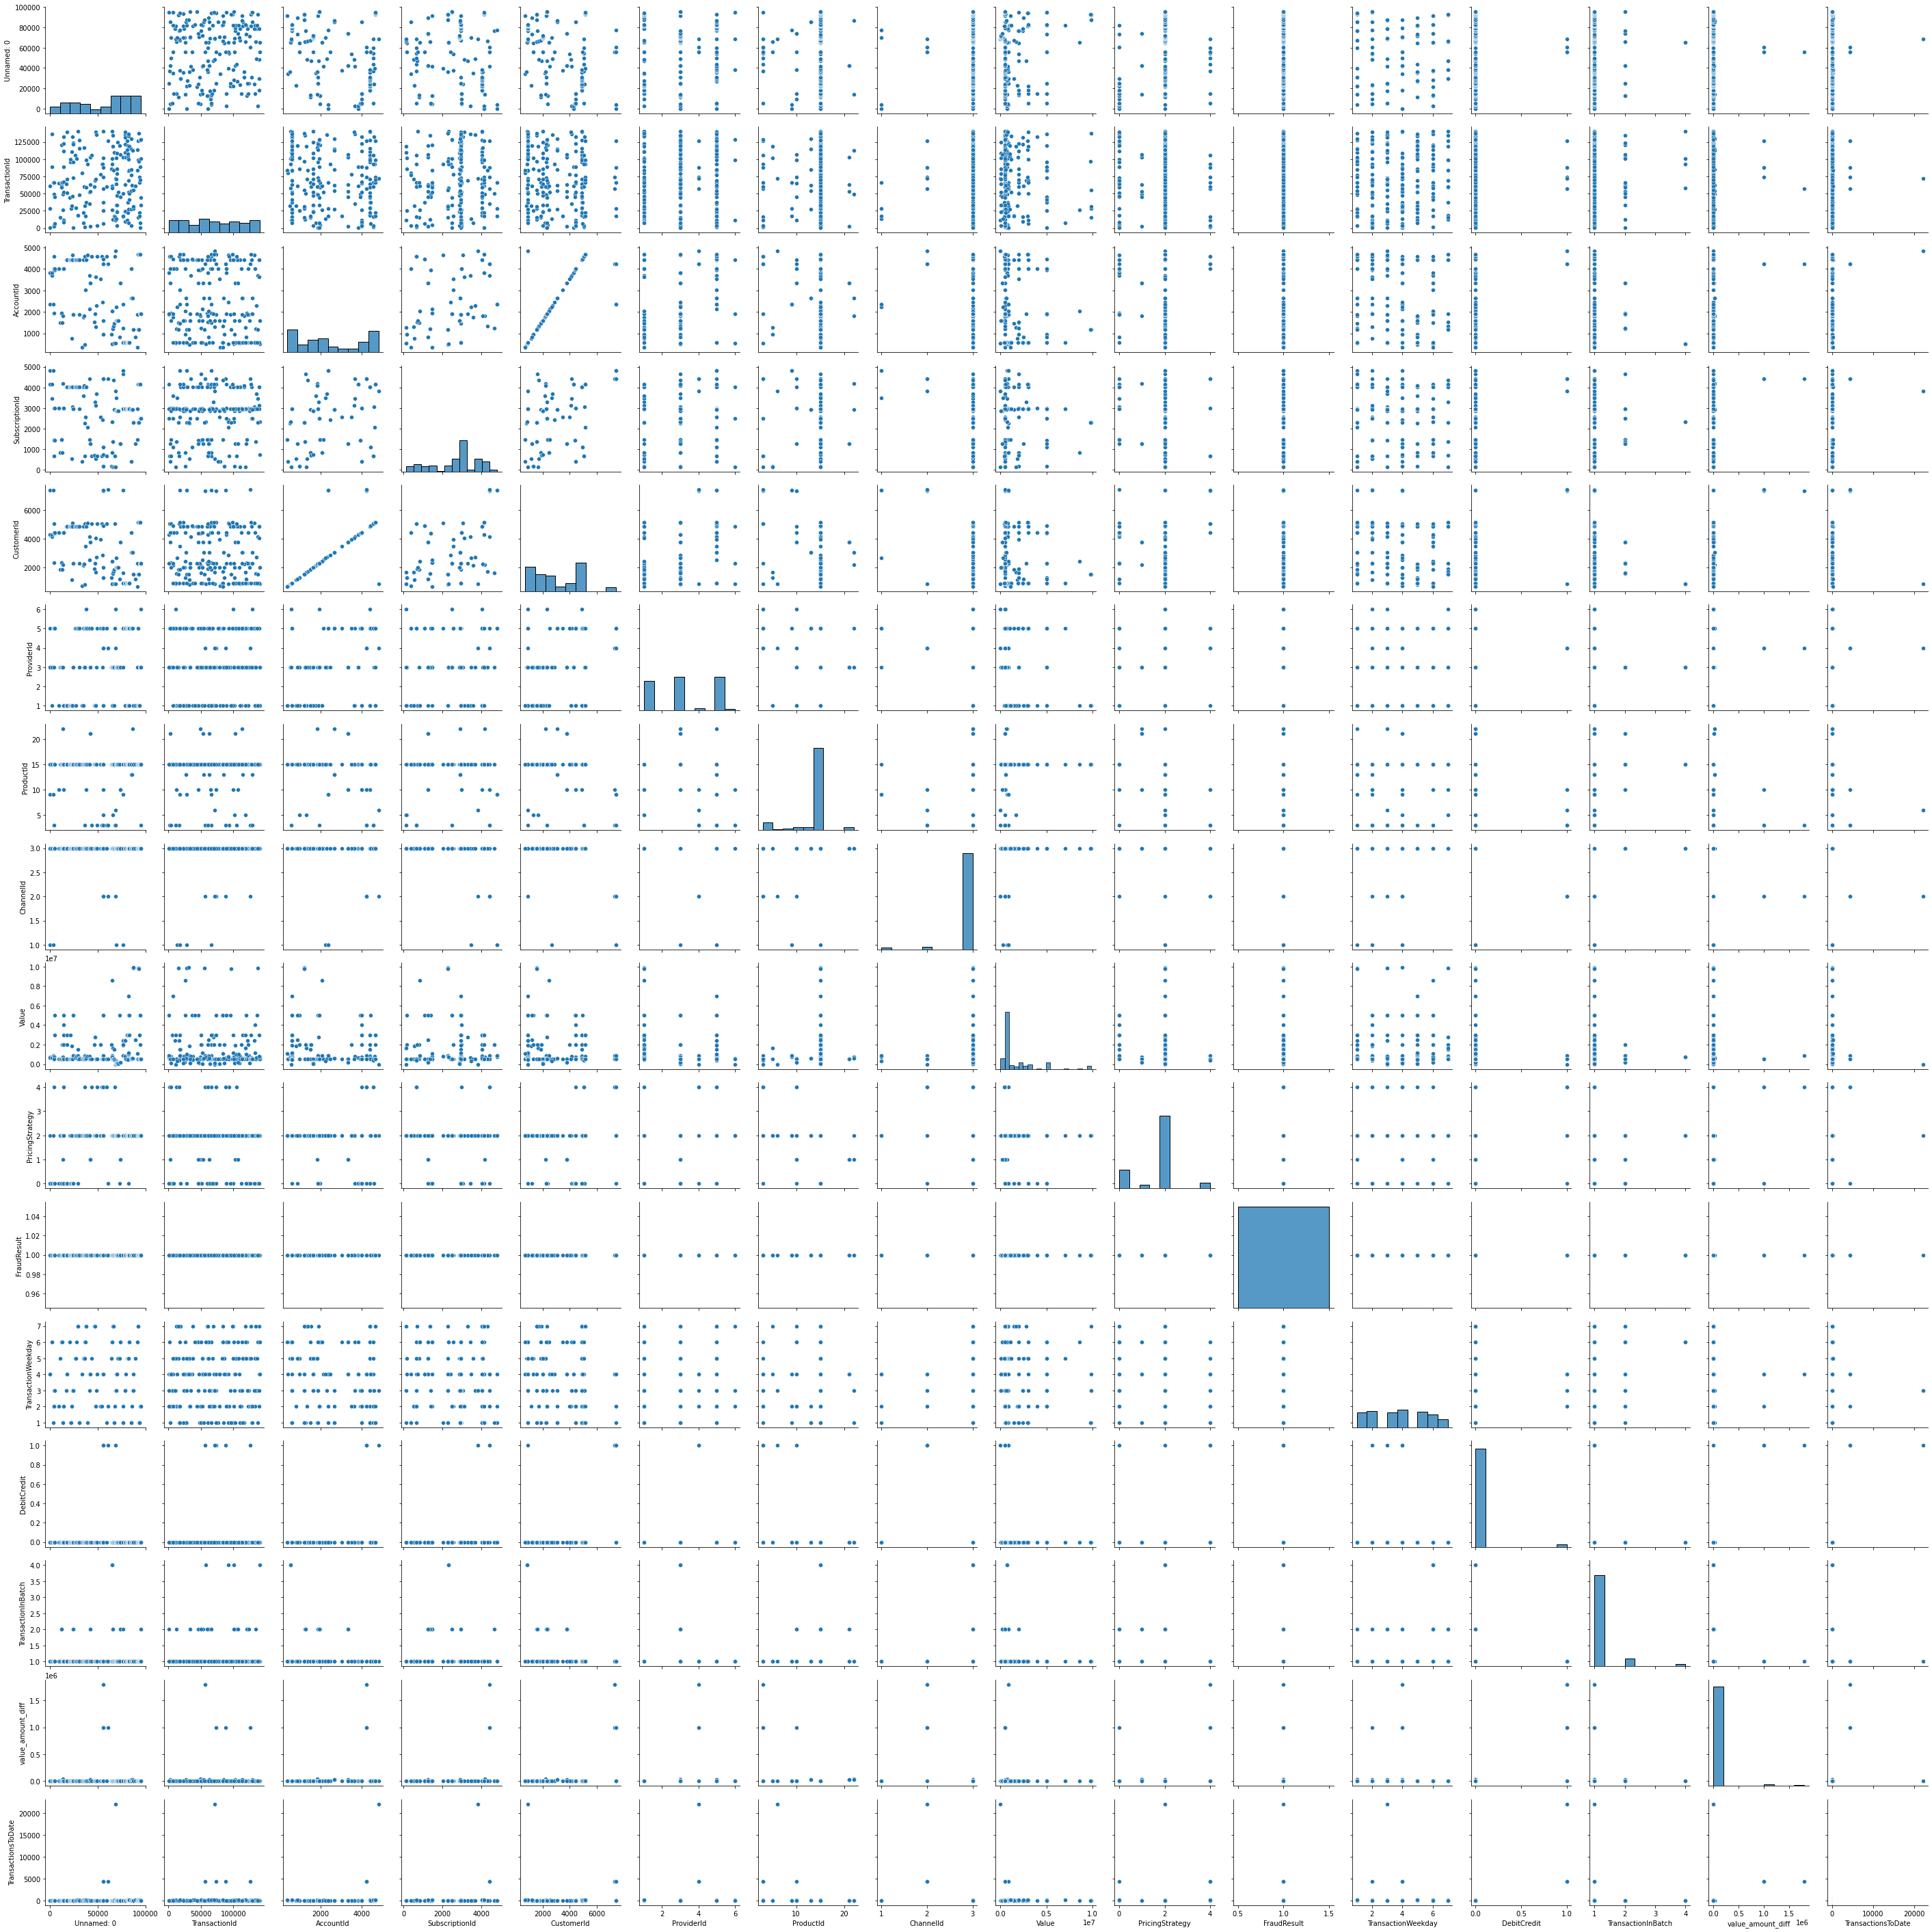

In [12]:
sns.pairplot(frauds)

/Users/danielastuermer/neuefische/ds-ml-project/.venv/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning:

5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/Users/danielastuermer/neuefische/ds-ml-project/.venv/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning:

34.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



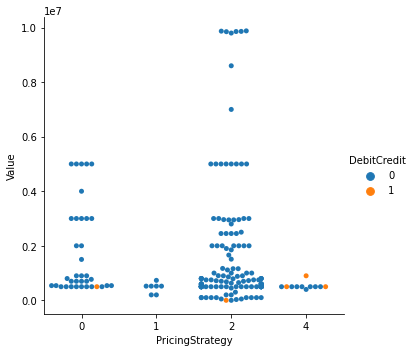

In [13]:
g = sns.catplot(data=frauds, x="PricingStrategy", y="Value",hue="DebitCredit",kind="swarm")

/Users/danielastuermer/neuefische/ds-ml-project/.venv/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning:

27.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/Users/danielastuermer/neuefische/ds-ml-project/.venv/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning:

32.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/Users/danielastuermer/neuefische/ds-ml-project/.venv/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning:

29.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



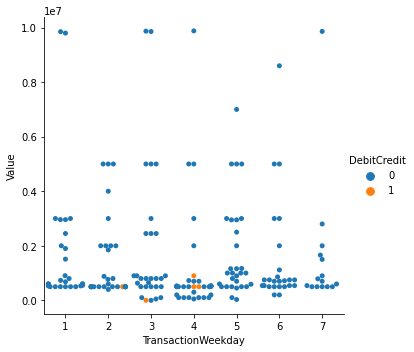

In [14]:
g = sns.catplot(data=frauds, x="TransactionWeekday", y="Value",hue="DebitCredit",kind="swarm")

/Users/danielastuermer/neuefische/ds-ml-project/.venv/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning:

41.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/Users/danielastuermer/neuefische/ds-ml-project/.venv/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning:

16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/Users/danielastuermer/neuefische/ds-ml-project/.venv/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning:

62.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



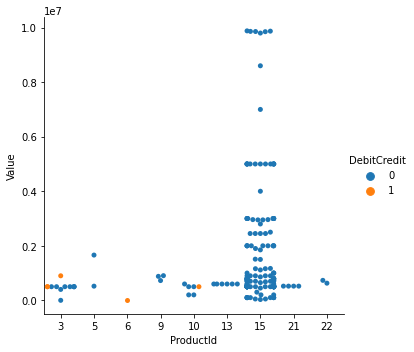

In [15]:
g = sns.catplot(data=frauds, x="ProductId", y="Value",hue="DebitCredit",kind="swarm")

/Users/danielastuermer/neuefische/ds-ml-project/.venv/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning:

35.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



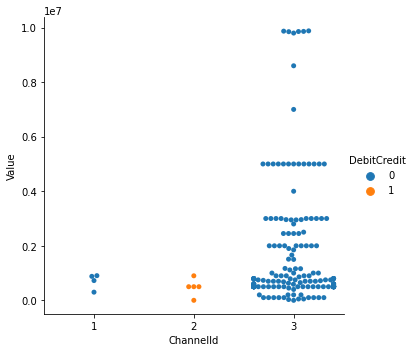

In [16]:
g = sns.catplot(data=frauds, x="ChannelId", y="Value",hue="DebitCredit",kind="swarm")

In [17]:
frauds.query('ChannelId == 2')

,Unnamed: 0,TransactionId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Value,PricingStrategy,FraudResult,TransactionDate,DayTime,TransactionWeekday,DebitCredit,TransactionInBatch,value_amount_diff,TransactionsToDate
55822,55822,56954,4249,4429,7339,4,3,airtime,2,900000,4,1,2019-01-10,afternoon,4,1,1,1800000.0,4363
55841,55841,73797,4249,4429,7339,4,10,airtime,2,500000,4,1,2019-01-10,afternoon,4,1,1,1000000.0,4365
56035,56035,87682,4249,4429,7401,4,3,airtime,2,500000,4,1,2019-01-10,evening,4,1,1,1000000.0,4367
60834,60834,126320,4249,4429,7429,4,3,airtime,2,500000,0,1,2019-01-15,midday,2,1,1,1000000.0,4385
68918,68918,71725,4841,3829,865,4,6,financial_services,2,1005,2,1,2019-01-23,morning,3,1,1,2010.0,22109


/Users/danielastuermer/neuefische/ds-ml-project/.venv/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning:

21.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/Users/danielastuermer/neuefische/ds-ml-project/.venv/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning:

34.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/Users/danielastuermer/neuefische/ds-ml-project/.venv/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning:

29.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



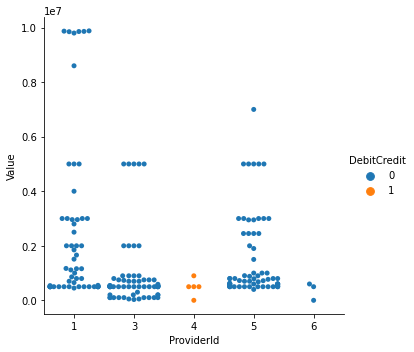

In [18]:
g = sns.catplot(data=frauds, x="ProviderId", y="Value",hue="DebitCredit",kind="swarm")

/Users/danielastuermer/neuefische/ds-ml-project/.venv/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning:

8.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/Users/danielastuermer/neuefische/ds-ml-project/.venv/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning:

38.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/Users/danielastuermer/neuefische/ds-ml-project/.venv/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning:

15.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/Users/danielastuermer/neuefische/ds-ml-project/.venv/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning:

10.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



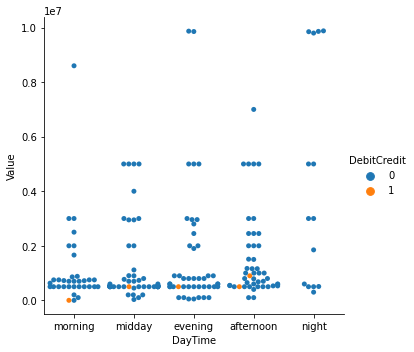

In [19]:
g = sns.catplot(data=frauds, x="DayTime", y="Value",hue="DebitCredit",kind="swarm")

Erkenntnisse:
- Insgesamt gibt es nur 5 DebitCredit = 1 in frauds (Credit)
- Frauds gibt es in allen PricingStrategien; In Strategie 1 nur DebitCredit =0
- Frauds gibt es an allen Wochentagen
- Frauds treten gehäuft bei Productid 15 auf
- Frauds treten vor allem bei Channelid 3 auf; alle 5 Creditfrauds fallen in Channelid 2 (ausschließlich credits)
- Frauds gibt es bei allen Providerids; alle 5 Creditfrauds fallen in Providerid 4 (ausschließlich credits)
- Frauds verteilen sich recht gleichmäßig auf die vers. Tageszeiten (nachts etwas weniger)